In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

import keras
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [17]:
keras.backend.clear_session()

In [ ]:
# Loading the trained Convolutional Neural Network
print('[INFO] Loading Network...')
model = load_model(r'--\Hotdog or Not Hotdog\Model\weights_inception.hdf5')
print('[INFO] weight_inception Loaded')


In [114]:
def predict(image):
    original = image.copy()
    
    # Preprocess the image for classification
    image = cv2.resize(image, (224,224))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    # Classify the images into
    (hotdog, nothotdog) = model.predict(image)[0], 1 - model.predict(image)[0]
    print("hotdog Prob = ", hotdog[0])
    print("nothotdog Prob = ", nothotdog[0])
    
    # build the label
    label = "Hotdog" if hotdog > nothotdog else "Not Hotdog"
    proba = hotdog[0] if hotdog[0] > nothotdog[0] else nothotdog[0]
    label = "{}: {:.2f}%".format(label, proba * 100)
    
    # Displaying the image
    font = cv2.FONT_HERSHEY_SIMPLEX 
    org = (15, 50)
    fontScale = 1.25
    color = (0, 0, 255)
    thickness = 2

    image = cv2.putText(original, label, org, font, fontScale, color, thickness) 

    #Show the image with matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

#### Test 1

hotdog Prob =  0.9792237
nothotdog Prob =  0.020776272


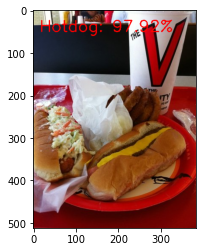

In [115]:
# Loading the image
image = cv2.imread(r'--\Hotdog or Not Hotdog\Test\189511.jpg')
predict(image)

#### Test 2

hotdog Prob =  0.00012032808
nothotdog Prob =  0.99987966


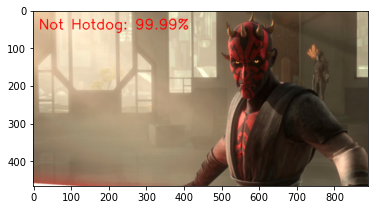

In [116]:
# Loading the image
image = cv2.imread(r'--\Hotdog or Not Hotdog\Test\Darth-Maul.jpg')
predict(image)

#### Test 3

hotdog Prob =  0.06682789
nothotdog Prob =  0.9331721


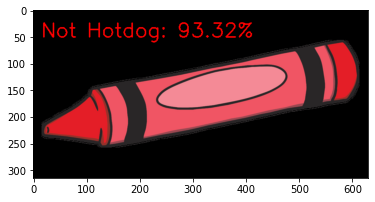

In [117]:
# Loading the image
image = cv2.imread(r'--\Hotdog or Not Hotdog\Test\Red-Crayon.jpg')
predict(image)

#### Test 4

hotdog Prob =  0.65302503
nothotdog Prob =  0.34697497


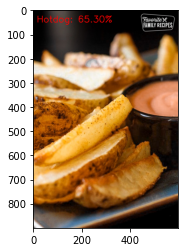

In [118]:
# Loading the image
image = cv2.imread(r'--\Hotdog or Not Hotdog\Test\Wedges.jpg')
predict(image)

#### Test 5

hotdog Prob =  0.9783691
nothotdog Prob =  0.021630883


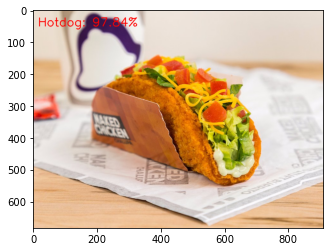

In [120]:
# Loading the image
image = cv2.imread(r'--\Hotdog or Not Hotdog\Test\taco.jpg')
predict(image)

#### Test 6


hotdog Prob =  0.1761472
nothotdog Prob =  0.8238528


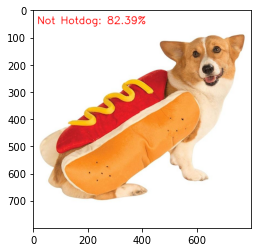

In [119]:
# Loading the image
image = cv2.imread(r'--\Hotdog or Not Hotdog\Test\dog.jpg')
predict(image)